In [83]:
numbers = [1,5,8,9,0,3,2,4]


In [84]:
def classical_oracle(input):
    winner = 4
    if input is winner:
        response = True
    else:
        response = False
    return response

In [85]:
for index, trial_nr in enumerate(numbers):
    if classical_oracle(trial_nr) is True:
        print('Winner found at index %i'%index)
        print('%i calls to the classical oracle'%(index+1))
        break

Winner found at index 7
8 calls to the classical oracle


In [63]:
from pyquil import get_qc, Program
from pyquil.gates import CZ, H, Z, T, CNOT, X, MEASURE
from pyquil.latex import display
from pyquil.api import WavefunctionSimulator
import matplotlib.pyplot as plt
import numpy as np

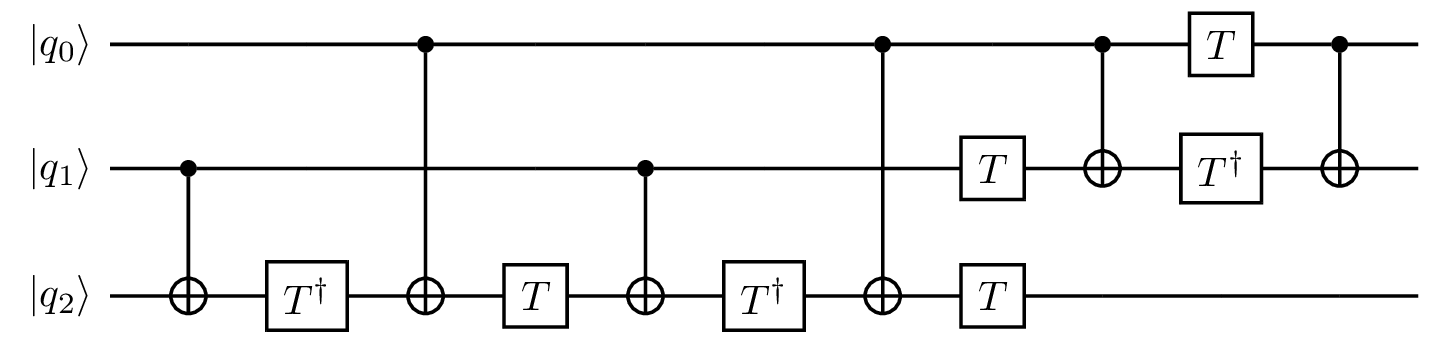

In [2]:
t_gate_1 = Program(T(1)).dagger()
t_gate_2 = Program(T(2)).dagger()
quantum_oracle = Program()
#quantum_oracle += H(2)
quantum_oracle += CNOT(1,2)
quantum_oracle += t_gate_2
quantum_oracle += CNOT(0,2)
quantum_oracle += T(2)
quantum_oracle += CNOT(1,2)
quantum_oracle += t_gate_2
quantum_oracle += CNOT(0,2)
quantum_oracle += T(1)
quantum_oracle += T(2)
quantum_oracle += CNOT(0,1)
#quantum_oracle += H(2)
quantum_oracle += T(0)
quantum_oracle += t_gate_1
quantum_oracle += CNOT(0,1)
display(quantum_oracle)

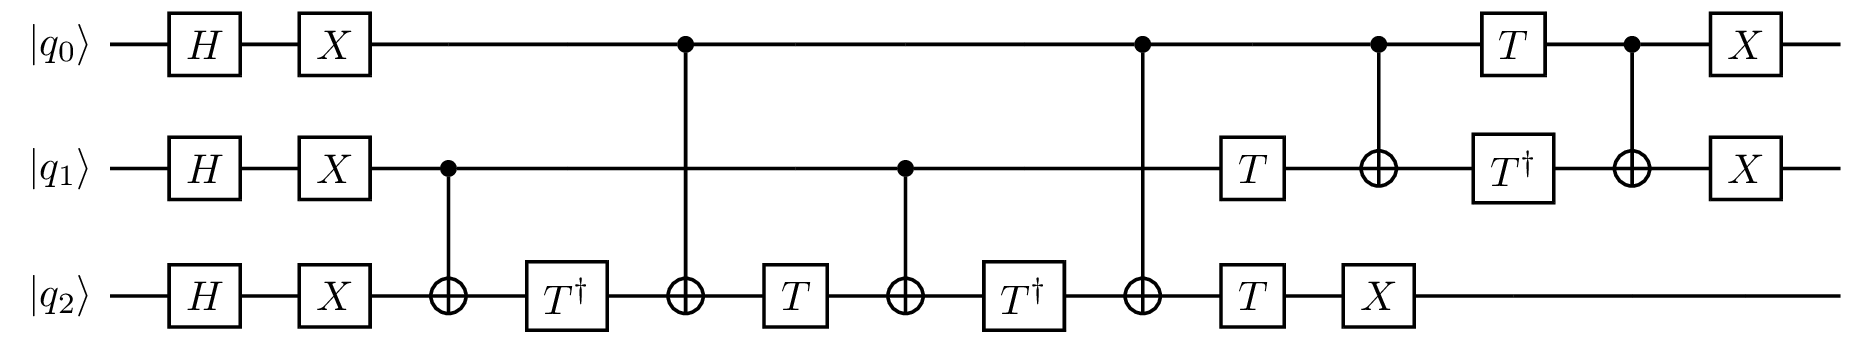

In [55]:
grover_circuit = Program()
grover_circuit += H(0)
grover_circuit += H(1)
grover_circuit += H(2)
grover_circuit += X(0)
grover_circuit += X(1)
grover_circuit += X(2)
grover_circuit += quantum_oracle
grover_circuit += X(0)
grover_circuit += X(1)
grover_circuit += X(2)
display(grover_circuit)

In [56]:
wavefunction_simulator = WavefunctionSimulator()
wavefunction = wavefunction_simulator.wavefunction(grover_circuit)
print(wavefunction)


(-0.3535533906+0j)|000> + (0.3535533906+0j)|001> + (0.3535533906+0j)|010> + (0.3535533906+0j)|011> + (0.3535533906+0j)|100> + (0.3535533906+0j)|101> + (0.3535533906+0j)|110> + (0.3535533906+0j)|111>


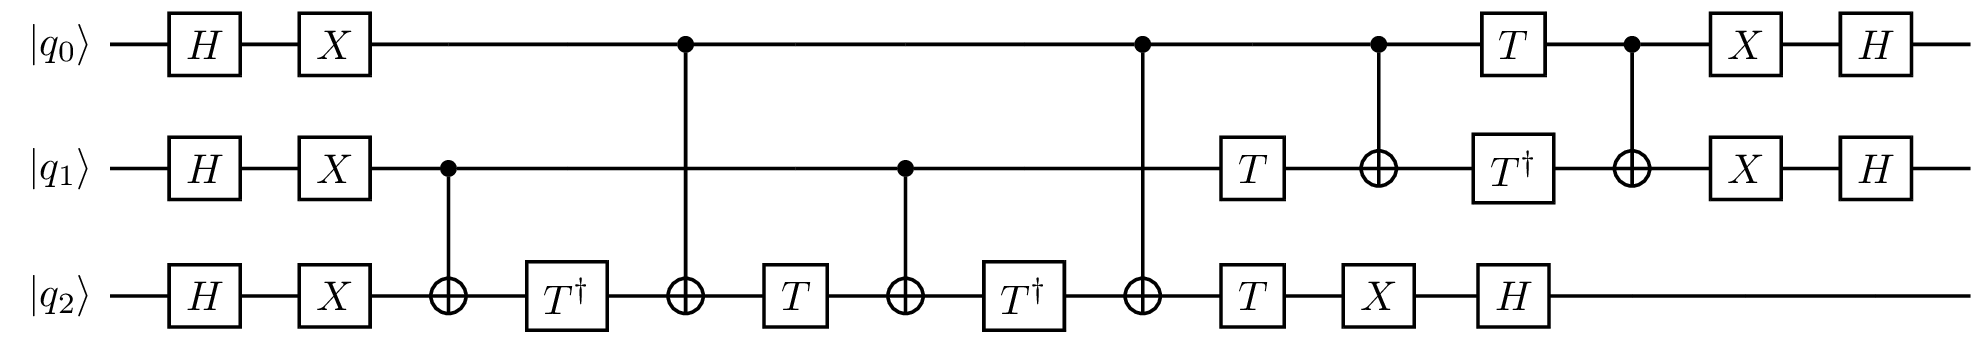

In [58]:
reflection = Program()
reflection += H(0)
reflection += H(1)
reflection += H(2)
reflection += X(0)
reflection += X(1)
reflection += X(2)
reflection += quantum_oracle
reflection += X(0)
reflection += X(1)
reflection += X(2)
reflection += H(0)
reflection += H(1)
reflection += H(2)
display(reflection)


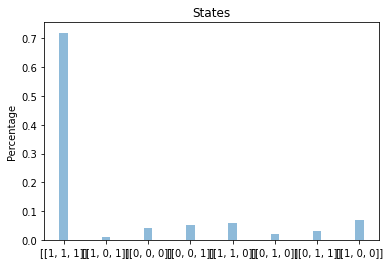

In [66]:
grover_circuit = Program()
grover_circuit += H(0)
grover_circuit += H(1)
grover_circuit += H(2)
# grover_circuit += X(0)
# grover_circuit += X(1)
# grover_circuit += X(2)
grover_circuit += quantum_oracle
# grover_circuit += X(0)
# grover_circuit += X(1)
# grover_circuit += X(2)
grover_circuit += reflection

ro = grover_circuit.declare('ro', 'BIT', 3)
grover_circuit += MEASURE(0, ro[0])
grover_circuit += MEASURE(1, ro[1])
grover_circuit += MEASURE(2, ro[2])
    
display(grover_circuit)
qvm = get_qc('3q-qvm')
results = []
for i in range(100):
    results.append(qvm.run(grover_circuit).tolist())


unique = []
for x in results:
    if x not in unique:
        unique.append(x)

tally = []        
for i in range(len(unique)):
    tally.append(results.count(unique[i])/100)

y_pos = np.arange(len(unique))
plt.bar(y_pos, tally, width=0.2, align='center', alpha=0.5)
plt.xticks(y_pos, unique)
plt.ylabel('Percentage')
plt.title('States')
plt.show()